In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
train_target = pd.read_csv("hw11t5v0_target.txt", header=None)
test_target = pd.read_csv("hw11t5v0_target_test.txt", header=None)
train = pd.read_csv("hw11t5v0_train.txt", header=None, sep='\t')
test = pd.read_csv("hw11t5v0_test.txt", header=None, sep='\t')

train_target.columns = ["y"]
test_target.columns = ["y"]



Посмотрим, как меняется расположение точек в двумерном пространстве в зависимости от значения перплексии (сглаженный показатель эффективного числа соседей) для значений перплексии в диапазоне 30 - 150

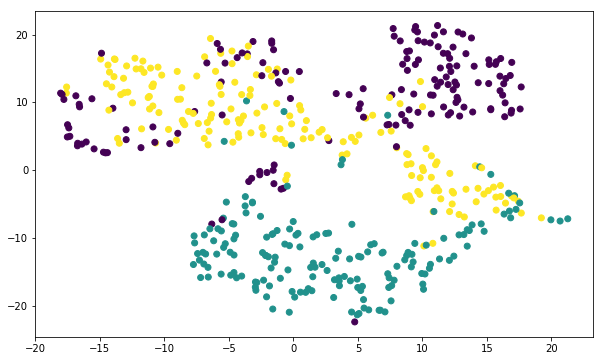

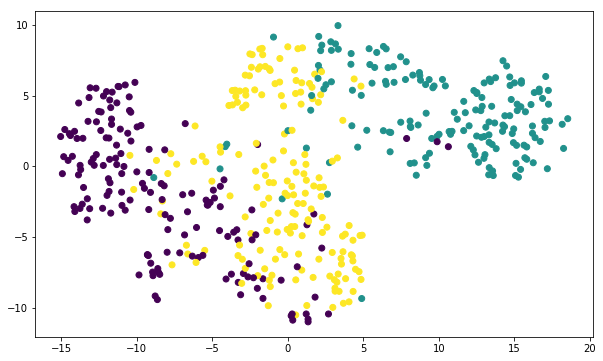

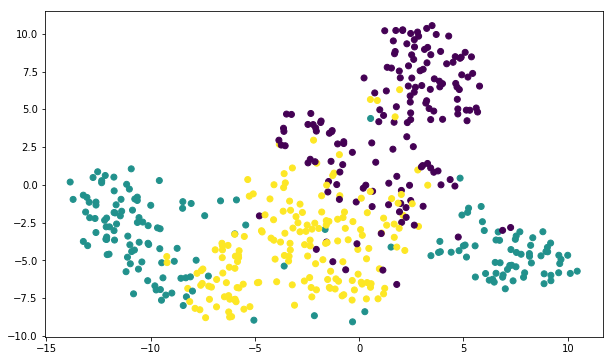

In [3]:
for perplexity in [30, 50, 75]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_target.values)
    plt.show()
    

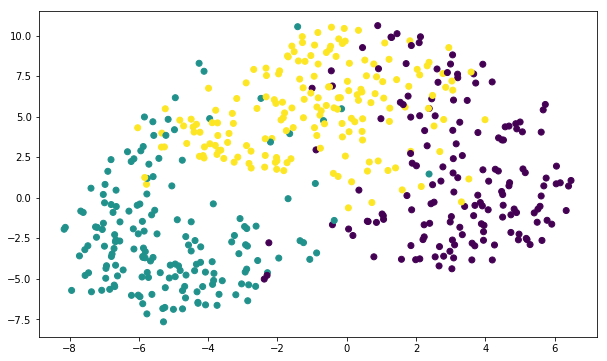

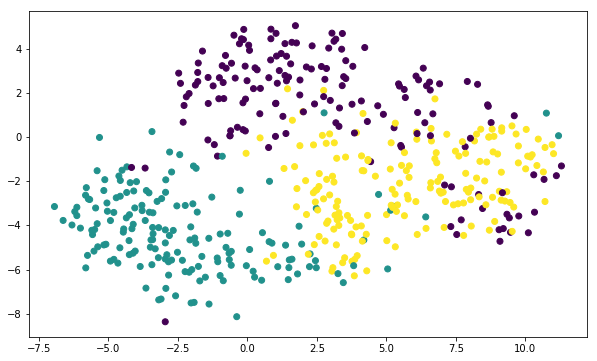

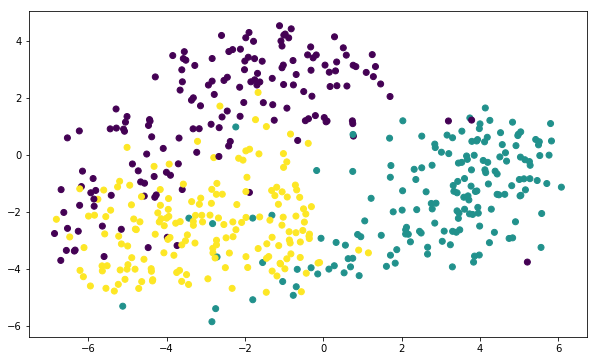

In [4]:
for perplexity in [100, 125, 150]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_target.values)
    plt.show()
    

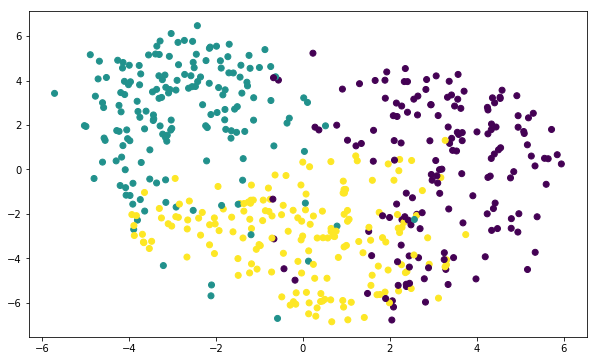

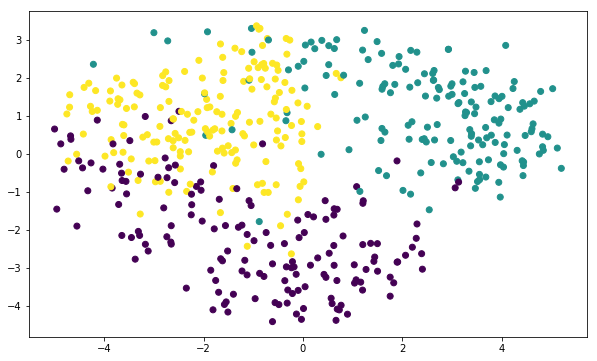

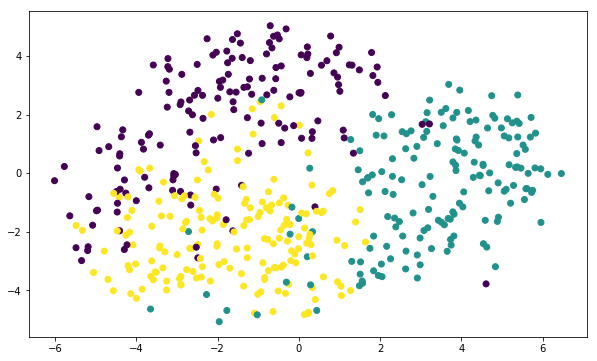

In [5]:
for perplexity in [175, 190, 210]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_target.values)
    plt.show()
    

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn

accuracy = metrics.make_scorer(accuracy_score, greater_is_better=True)
avg_per = metrics.make_scorer(metrics.average_precision_score, greater_is_better=True)


In [41]:

def apply_regressor(train, train_target, perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    y = np.array(list(map(lambda x: [x],train_target["y"].values)))
    c, r = y.shape
    y = y.reshape(c,)
    y = sklearn.preprocessing.label_binarize(y, classes=[1, 2, 3])
    
    parameters = {"n_neighbors": np.arange(1, 20)}

    clf = KNeighborsClassifier()
    regress = GridSearchCV(clf, parameters, scoring=avg_per)
    regress.fit(X_hat, y)
    print(regress.best_estimator_, regress.best_score_)



In [42]:
import warnings
warnings.filterwarnings("ignore")

for perplexity in[30, 50, 75, 100, 125, 150, 160, 175, 180]:
    apply_regressor(train, train_target,perplexity)
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform') 0.881946954731
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 0.891668691847
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform') 0.887011173371
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform') 0.879737949507
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform') 0.889596805887
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=Non

Жадный поиск с кросс-валидацией показал, что ошибка примерно одинакова для любого perplexity

In [47]:
model =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

y = np.array(list(map(lambda x: [x],train_target["y"].values)))
y_test = np.array(list(map(lambda x: [x],test_target["y"].values)))
c, r = y.shape
y = y.reshape(c,)
y = sklearn.preprocessing.label_binarize(y, classes=[1, 2, 3])

tsne = TSNE(n_components=2, perplexity=100)
X_hat = tsne.fit_transform(train.values)
train_hat = tsne.fit_transform(test.values)

model.fit(X_hat, y)
predictions = model.predict(train_hat)
y_pr = sklearn.preprocessing.label_binarize(predictions, classes=[1, 2, 3])
y_tar = sklearn.preprocessing.label_binarize(y_test, classes=[1, 2, 3])
print("ошибка для лучшей модели-%.2f" 
      % metrics.average_precision_score(y_tar, y_pr ))


ошибка для лучшей модели-0.67


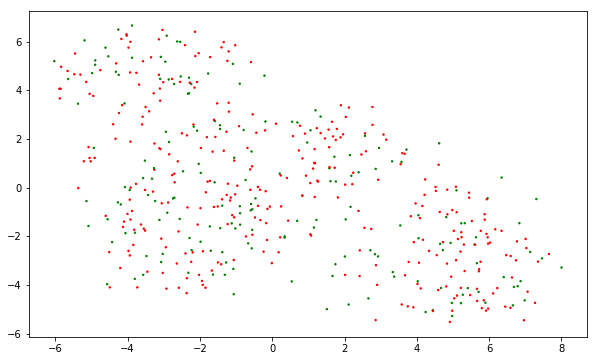

In [48]:
tsne = TSNE(n_components=2, perplexity=perplexity)
X_hat = tsne.fit_transform(train.values)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=['r' if ((y_tar[i][0] != y_pr[i][0]) 
                                                 or(y_tar[i][1] != y_pr[i][1]) 
                                                 or (y_tar[i][2] != y_pr[i][2])) else 'g' for i in range(len(y_pr))], s=2)
plt.show()